# DAPT理论数值复现：Rigolin & Ortiz (2014)

### 项目目标
本Jupyter Notebook旨在精确复现物理学家G. Rigolin和G. Ortiz在其2014年论文 **"Degenerate Adiabatic Perturbation Theory: Foundations and Applications" (Phys. Rev. A 90, 022104)** 中，用于验证**简并绝热微扰理论 (DAPT)** 有效性的关键数值实验。

我们将使用一个为此项目专门开发的、高性能的Python工具库 `dapt_tools` 来执行所有计算和可视化。


### 理论与模型速览

根据我们的核心参考文档 `复现笔记.md`，本次复现的核心是一个四能级简并系统。DAPT理论旨在为这类系统的含时薛定谔方程提供一个高精度的近似解。

#### 1. DAPT核心思想：波函数拟设

DAPT的出发点是将总波函数 $|\Psi(s)\rangle$ 展开为一个关于演化速率参数 $v$ 的微扰级数：
$$
|\Psi(s)\rangle = \sum_{p=0}^{\infty}v^p|\Psi^{(p)}(s)\rangle
$$
其中，每一阶修正项 $|\Psi^{(p)}(s)\rangle$ 都在瞬时本征基矢 $|\mathbf{n}(s)\rangle$ 上展开，并引入了复杂的系数矩阵 $\mathbf{B}_{mn}^{(p)}(s)$ 和动态相位 $\omega_m(s)$ 来捕捉系统的演化细节。

#### 2. DAPT计算引擎：递推关系

DAPT的强大之处在于提供了一个系统性的、可编程的递推关系，用于逐阶计算系数矩阵 $\mathbf{B}_{mn}^{(p)}(s)$。其核心方程为：
$$
\frac{\mathrm{i}}{\hbar}\Delta_{nm}(s)\mathbf{B}_{mn}^{(p+1)}(s) + \dot{\mathbf{B}}_{mn}^{(p)}(s) + \sum_{k=0}\mathbf{B}_{mk}^{(p)}(s)\mathbf{M}^{kn}(s) = 0
$$
我们的`dapt_tools.core`模块严格实现了这一递推关系，采用“先非对角，后对角”的策略，并使用高精度ODE求解器来保证对角项的计算准确性。

#### 3. 复现模型：一个四能级系统

我们研究的系统由一个时变的 $4 \times 4$ 哈密顿量 $\mathbf{H}(s)$ 描述，其所有时间依赖性都包含在能量函数 $E(s) = E_0 + \lambda (s-1/2)^2$ 和相位函数 $\theta(s) = \theta_0 + ws^2$ 中。

**至关重要的一点**：该模型允许我们获得瞬时本征矢的**解析表达式**。我们的`dapt_tools.hamiltonian`模块**直接使用这些解析公式**，而非数值对角化，这从根本上保证了本征矢量的连续性，并极大地提高了计算精度。

#### 4. 绝热性判据：关键参数 $\epsilon(s)$

DAPT的有效性由一个关键的无量纲参数 $\epsilon(s)$ 控制：
$$
\epsilon(s) = \frac{\sqrt{2}\hbar v}{E(s)}
$$
这个参数代表了系统演化速率（由 $v$ 控制）与瞬时能隙（由 $E(s)$ 控制）之间的竞争关系。
- 当 $\epsilon(s) \ll 1$ 时，系统处于**绝热区**，DAPT应是有效的。
- 当 $\epsilon(s) \gtrsim 1$ 时，系统处于**非绝热区**，DAPT预计会失效。

本Notebook将通过一系列数值实验，系统性地验证上述理论预测。


In [1]:
# 魔法命令，用于自动重载外部模块，方便调试
%load_ext autoreload
%autoreload 2

# 导入标准库
import numpy as np
import matplotlib.pyplot as plt

# 从我们的工具库导入所有需要的模块和函数
from dapt_tools import hamiltonian, core, exact_solver, utils

# 设置全局绘图风格，确保图表美观且支持中文
utils.setup_matplotlib_style()
print("环境初始化完成，所有工具已准备就绪。")


环境初始化完成，所有工具已准备就绪。


---
## 实验一：验证DAPT在绝热区的收敛性 (Fig. 2)

**实验目标:** 在绝热参数 $\epsilon \ll 1$ 的条件下，验证DAPT的各阶修正能系统性地提高计算精度。

**参数设定 (恒定能隙):**
- $\lambda = 0$
- $\hbar = 1.0$
- $\theta_0 = 0.1$
- $E_0 = 1.5$
- $v = w = 0.5$
- 初始状态: $|0^0(0)\rangle$

开始精确求解薛定谔方程...
   时间点数量: 201
   时间范围: 0.000 → 1.000
   正在求解含时薛定谔方程...
   ODE求解完成 (耗时: 0.01s)
   重构复数波函数...
   精确解计算完成。总耗时: 0.01s
开始DAPT计算，最高阶数: 2
   时间点数量: 201
   时间范围: 0.000 → 1.000

第1步：预计算M矩阵和WZ相矩阵...
   预计算所有时间点的M矩阵...
计算M矩阵...
   进度: 0.5% (1/201)
   进度: 10.4% (21/201)
   进度: 20.4% (41/201)
   进度: 30.3% (61/201)
   进度: 40.3% (81/201)
   进度: 50.2% (101/201)
   进度: 60.2% (121/201)
   进度: 70.1% (141/201)
   进度: 80.1% (161/201)
   进度: 90.0% (181/201)
   进度: 100.0% (201/201)
   计算M矩阵 完成。
   计算WZ相矩阵...
   计算第 0 个子空间的WZ相矩阵...
      求解WZ相矩阵微分方程...
      WZ相矩阵计算完成 (耗时: 0.27s)
   计算第 1 个子空间的WZ相矩阵...
      求解WZ相矩阵微分方程...
      WZ相矩阵计算完成 (耗时: 0.27s)
   预计算高精度动态相位...
   第1步完成 (耗时: 0.55s)

第2步：初始化零阶系数...
   第2步完成 (耗时: 0.00s)

第3步：递推计算高阶修正项 (0阶 → 2阶)...
   计算第1阶修正项...

--- DEBUG: B^(1) Coefficients ---
Norm of B_10^(1): 1.3659296793353484
Norm of B_01^(1): 0.0
---------------------------------

   第1阶完成 (耗时: 0.53s)
   计算第2阶修正项...
   第2阶完成 (耗时: 0.98s)
   第3步完成 (耗时: 1.51s)

第4步：构造各阶DAPT近似解 (0阶 → 2阶

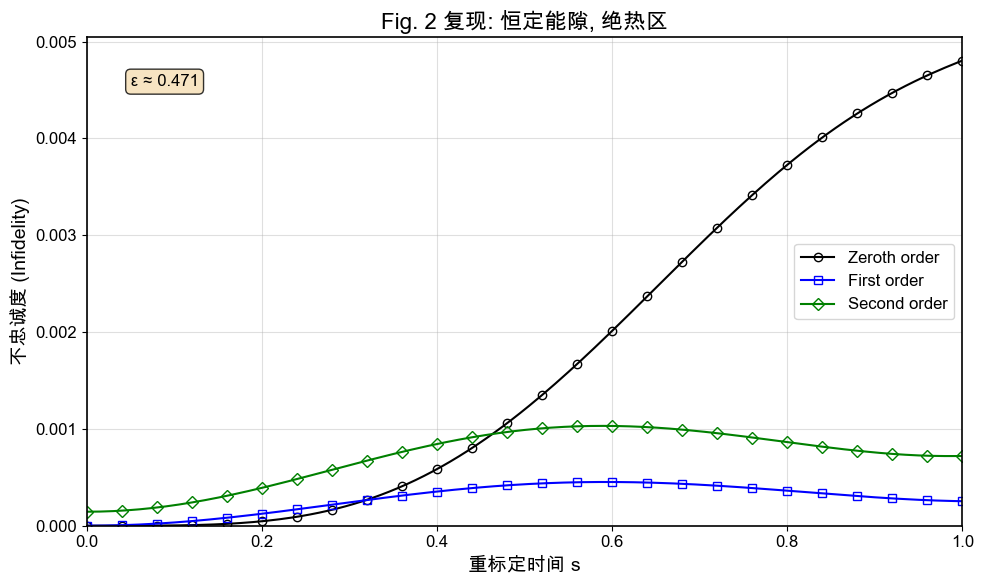

In [2]:
# --- 复现 Fig. 2 ---
params_fig2 = {'lambda': 0, 'hbar': 1.0, 'theta0': 0.1, 'E0': 1.5, 'v': 0.5, 'w': 0.5}
s_span = np.linspace(0, 1, 201)
psi_0 = hamiltonian.get_initial_state_in_standard_basis(params_fig2)
exact_solution_fig2 = exact_solver.solve_schrodinger_exact(s_span, params_fig2, psi_0)
dapt_results_fig2 = core.run_dapt_calculation(s_span, order=2, params=params_fig2)

infidelity_data_fig2 = {}
labels = ["Zeroth order", "First order", "Second order"]
for k in range(3):
    psi_approx = dapt_results_fig2['solutions'][k]
    infidelity_data_fig2[labels[k]] = utils.calculate_infidelity_series(exact_solution_fig2, psi_approx)
    
_, epsilon_value = utils.calculate_epsilon_parameter(params_fig2)
utils.plot_infidelity_comparison(
    s_span,
    infidelity_data_fig2,
    title="Fig. 2 复现: 恒定能隙, 绝热区",
    epsilon_value=epsilon_value
)
plt.show()


---
## 实验二：验证DAPT在非绝热区的失效 (Fig. 3)

**实验目标:** 在非绝热参数 $\epsilon \gtrsim 1$ 的条件下，展示DAPT微扰展开的失效。

**参数设定 (恒定能隙):**
- $\lambda = 0$
- $\hbar = 1.0$
- $\theta_0 = 0.1$
- $E_0 = 1.5$
- $v = w = 1.5$ (演化速度是实验一的3倍)


开始精确求解薛定谔方程...
   时间点数量: 41
   时间范围: 0.000 → 1.000
   正在求解含时薛定谔方程...
   ODE求解完成 (耗时: 0.01s)
   重构复数波函数...
   精确解计算完成。总耗时: 0.01s
开始DAPT计算，最高阶数: 2
   时间点数量: 41
   时间范围: 0.000 → 1.000

第1步：预计算M矩阵和WZ相矩阵...
   预计算所有时间点的M矩阵...
计算M矩阵...
   进度: 2.4% (1/41)
   进度: 12.2% (5/41)
   进度: 22.0% (9/41)
   进度: 31.7% (13/41)
   进度: 41.5% (17/41)
   进度: 51.2% (21/41)
   进度: 61.0% (25/41)
   进度: 70.7% (29/41)
   进度: 80.5% (33/41)
   进度: 90.2% (37/41)
   进度: 100.0% (41/41)
   计算M矩阵 完成。
   计算WZ相矩阵...
   计算第 0 个子空间的WZ相矩阵...
      求解WZ相矩阵微分方程...
      WZ相矩阵计算完成 (耗时: 0.06s)
   计算第 1 个子空间的WZ相矩阵...
      求解WZ相矩阵微分方程...
      WZ相矩阵计算完成 (耗时: 0.06s)
   预计算高精度动态相位...
   第1步完成 (耗时: 0.12s)

第2步：初始化零阶系数...
   第2步完成 (耗时: 0.00s)

第3步：递推计算高阶修正项 (0阶 → 2阶)...
   计算第1阶修正项...

--- DEBUG: B^(1) Coefficients ---
Norm of B_10^(1): 1.8599395151457896
Norm of B_01^(1): 0.0
---------------------------------

   第1阶完成 (耗时: 0.26s)
   计算第2阶修正项...
   第2阶完成 (耗时: 0.50s)
   第3步完成 (耗时: 0.75s)

第4步：构造各阶DAPT近似解 (0阶 → 2阶)...
构造各阶解...
   进度: 

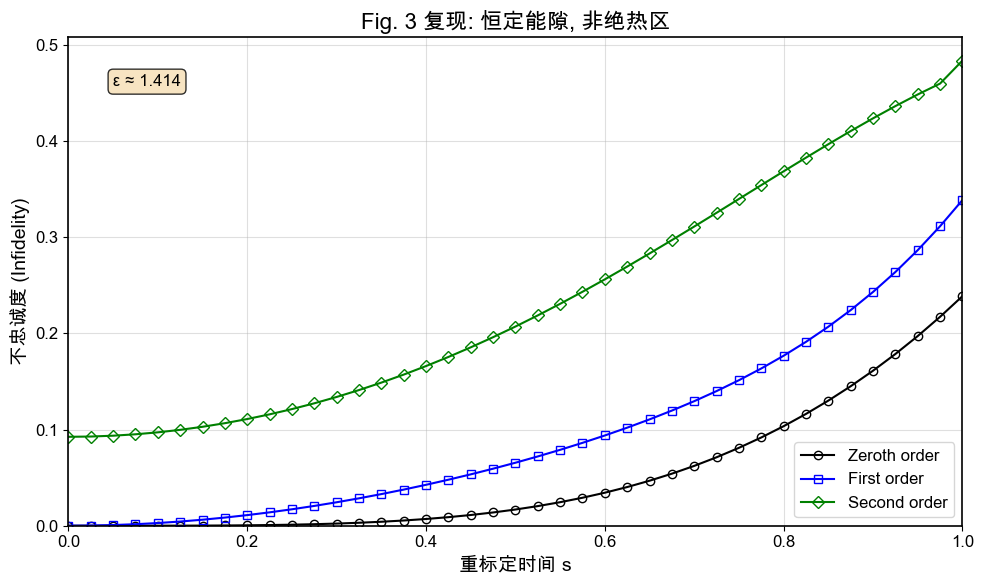

In [3]:
# --- 复现 Fig. 3 ---
params_fig3 = {'lambda': 0, 'hbar': 1.0, 'theta0': 0.1, 'E0': 1.5, 'v': 1.5, 'w': 1.5}
s_span = np.linspace(0, 1, 41)
psi_0_fig3 = hamiltonian.get_initial_state_in_standard_basis(params_fig3)
exact_solution_fig3 = exact_solver.solve_schrodinger_exact(s_span, params_fig3, psi_0_fig3)
dapt_results_fig3 = core.run_dapt_calculation(s_span, order=2, params=params_fig3)

infidelity_data_fig3 = {}
labels = ["Zeroth order", "First order", "Second order"]
for k in range(3):
    psi_approx = dapt_results_fig3['solutions'][k]
    infidelity_data_fig3[labels[k]] = utils.calculate_infidelity_series(exact_solution_fig3, psi_approx)

_, epsilon_value = utils.calculate_epsilon_parameter(params_fig3)
utils.plot_infidelity_comparison(
    s_span,
    infidelity_data_fig3,
    title="Fig. 3 复现: 恒定能隙, 非绝热区",
    epsilon_value=epsilon_value
)
plt.show()



--- 计算 Fig. 4, v = 0.3 ---
开始精确求解薛定谔方程...
   时间点数量: 41
   时间范围: 0.000 → 1.000
   正在求解含时薛定谔方程...
   ODE求解完成 (耗时: 0.01s)
   重构复数波函数...
   精确解计算完成。总耗时: 0.01s
开始DAPT计算，最高阶数: 2
   时间点数量: 41
   时间范围: 0.000 → 1.000

第1步：预计算M矩阵和WZ相矩阵...
   预计算所有时间点的M矩阵...
计算M矩阵...
   进度: 2.4% (1/41)
   进度: 12.2% (5/41)
   进度: 22.0% (9/41)
   进度: 31.7% (13/41)
   进度: 41.5% (17/41)
   进度: 51.2% (21/41)
   进度: 61.0% (25/41)
   进度: 70.7% (29/41)
   进度: 80.5% (33/41)
   进度: 90.2% (37/41)
   进度: 100.0% (41/41)
   计算M矩阵 完成。
   计算WZ相矩阵...
   计算第 0 个子空间的WZ相矩阵...
      求解WZ相矩阵微分方程...
      WZ相矩阵计算完成 (耗时: 0.06s)
   计算第 1 个子空间的WZ相矩阵...
      求解WZ相矩阵微分方程...
      WZ相矩阵计算完成 (耗时: 0.06s)
   预计算高精度动态相位...
   第1步完成 (耗时: 0.12s)

第2步：初始化零阶系数...
   第2步完成 (耗时: 0.00s)

第3步：递推计算高阶修正项 (0阶 → 2阶)...
   计算第1阶修正项...

--- DEBUG: B^(1) Coefficients ---
Norm of B_10^(1): 0.5087391881559035
Norm of B_01^(1): 0.0
---------------------------------

   第1阶完成 (耗时: 0.19s)
   计算第2阶修正项...
   第2阶完成 (耗时: 0.38s)
   第3步完成 (耗时: 0.57s)

第4步：构造各阶DAPT近似解 (

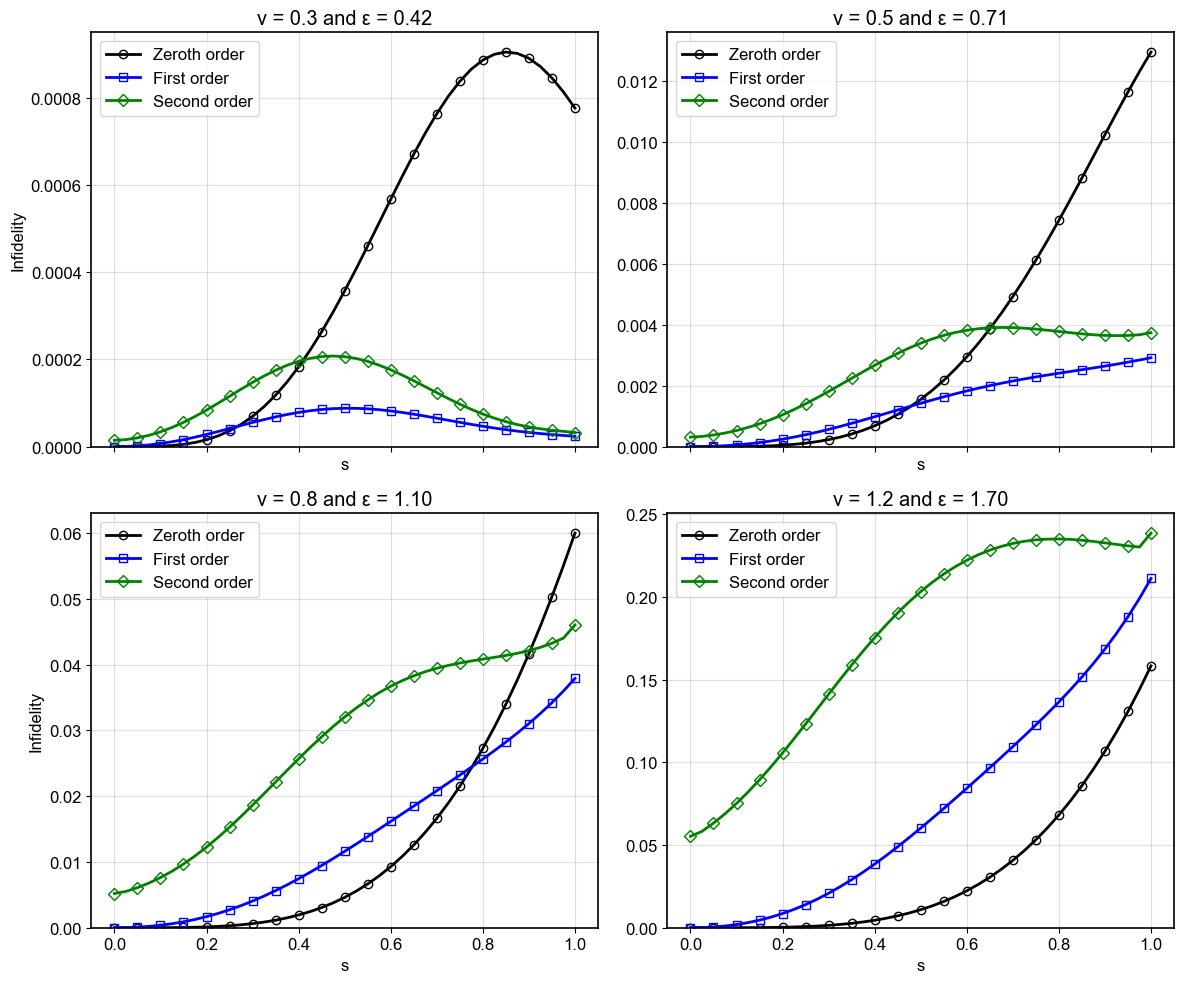

In [4]:
# --- 复现 Fig. 4 ---
s_span = np.linspace(0, 1, 41)
base_params_fig4 = {'lambda': 1.0, 'hbar': 1.0, 'theta0': 0.1, 'E0': 1.0}
v_list = [0.3, 0.5, 0.8, 1.2] 

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=False)
axes = axes.flatten()

for i, v_val in enumerate(v_list):
    ax = axes[i]
    print(f"\n--- 计算 Fig. 4, v = {v_val} ---")
    
    params = base_params_fig4.copy()
    params['v'] = v_val
    params['w'] = v_val
    
    psi_0 = hamiltonian.get_initial_state_in_standard_basis(params)
    exact_solution = exact_solver.solve_schrodinger_exact(s_span, params, psi_0)
    dapt_results = core.run_dapt_calculation(s_span, order=2, params=params)
    
    infidelity_data = {}
    labels = ["Zeroth order", "First order", "Second order"]
    for k in range(3):
        psi_approx = dapt_results['solutions'][k]
        infidelity_data[labels[k]] = utils.calculate_infidelity_series(exact_solution, psi_approx)

    # 绘图
    colors = ["black", "blue", "green"]
    markers = ['o', 's', 'D']
    for j, (label, infidelity) in enumerate(infidelity_data.items()):
        ax.plot(s_span, infidelity, color=colors[j], marker=markers[j], linestyle='-', markerfacecolor='none', markevery=2, label=label)

    _, epsilon_min = utils.calculate_epsilon_parameter(params)
    # 使用原文的epsilon值
    epsilon_map = {0.3: 0.42, 0.5: 0.71, 0.8: 1.1, 1.2: 1.7}
    ax.set_title(f'v = {v_val} and ε = {epsilon_map.get(v_val, epsilon_min):.2f}')
    ax.set_xlabel("s")
    if i % 2 == 0:
        ax.set_ylabel("Infidelity")
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.4)
    ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()



--- 计算 Fig. 5, E0 = 1.0 ---
开始精确求解薛定谔方程...
   时间点数量: 41
   时间范围: 0.000 → 1.000
   正在求解含时薛定谔方程...
   ODE求解完成 (耗时: 0.01s)
   重构复数波函数...
   精确解计算完成。总耗时: 0.01s
开始DAPT计算，最高阶数: 2
   时间点数量: 41
   时间范围: 0.000 → 1.000

第1步：预计算M矩阵和WZ相矩阵...
   预计算所有时间点的M矩阵...
计算M矩阵...
   进度: 2.4% (1/41)
   进度: 12.2% (5/41)
   进度: 22.0% (9/41)
   进度: 31.7% (13/41)
   进度: 41.5% (17/41)
   进度: 51.2% (21/41)
   进度: 61.0% (25/41)
   进度: 70.7% (29/41)
   进度: 80.5% (33/41)
   进度: 90.2% (37/41)
   进度: 100.0% (41/41)
   计算M矩阵 完成。
   计算WZ相矩阵...
   计算第 0 个子空间的WZ相矩阵...
      求解WZ相矩阵微分方程...
      WZ相矩阵计算完成 (耗时: 0.06s)
   计算第 1 个子空间的WZ相矩阵...
      求解WZ相矩阵微分方程...
      WZ相矩阵计算完成 (耗时: 0.06s)
   预计算高精度动态相位...
   第1步完成 (耗时: 0.12s)

第2步：初始化零阶系数...
   第2步完成 (耗时: 0.00s)

第3步：递推计算高阶修正项 (0阶 → 2阶)...
   计算第1阶修正项...

--- DEBUG: B^(1) Coefficients ---
Norm of B_10^(1): 0.5087391881559035
Norm of B_01^(1): 0.0
---------------------------------

   第1阶完成 (耗时: 0.18s)
   计算第2阶修正项...
   第2阶完成 (耗时: 0.37s)
   第3步完成 (耗时: 0.56s)

第4步：构造各阶DAPT近似解 

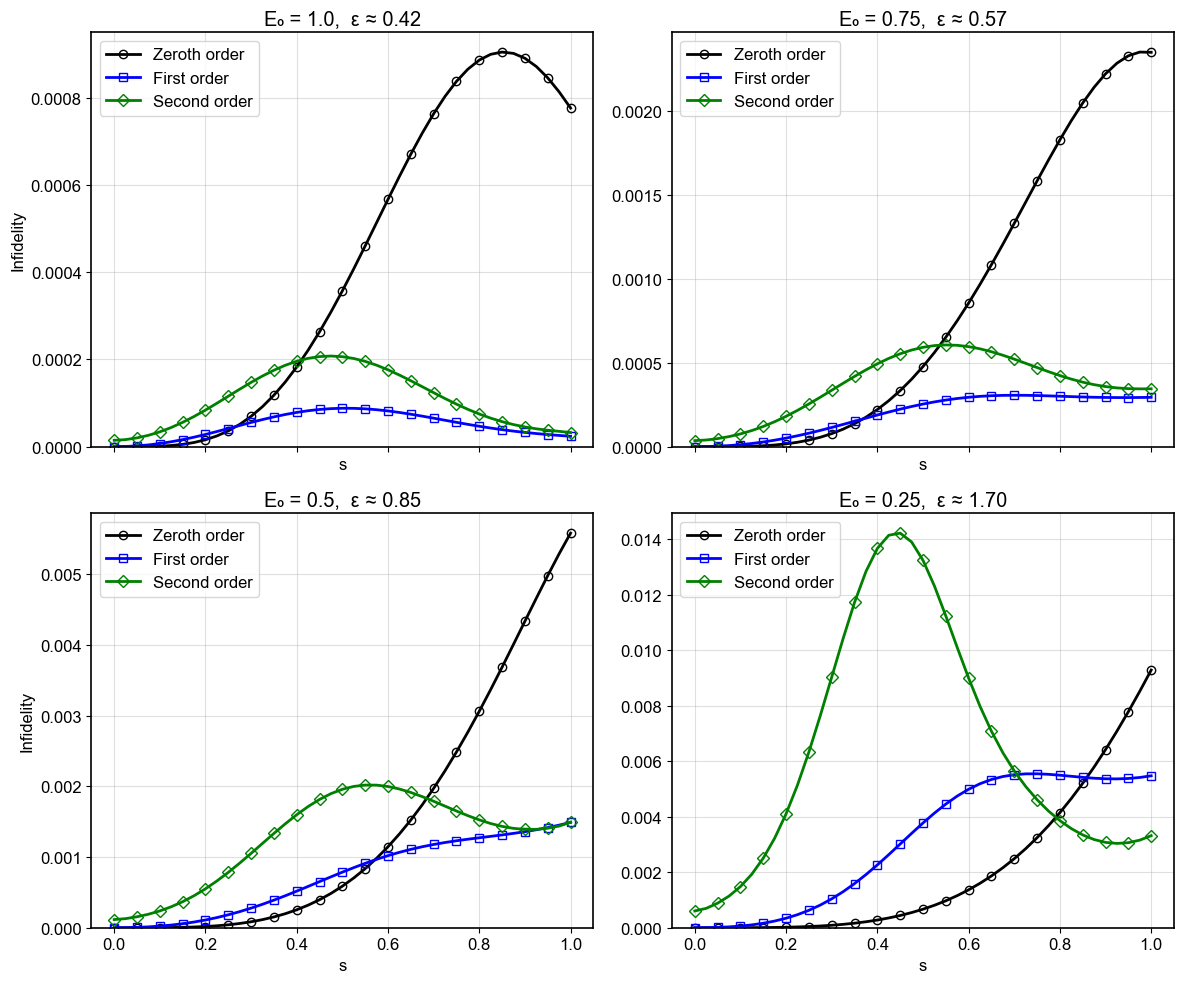

In [5]:
# --- 复现 Fig. 5 ---
s_span = np.linspace(0, 1, 41)
base_params_fig5 = {'lambda': 1.0, 'hbar': 1.0, 'theta0': 0.1, 'v': 0.3, 'w': 0.3}
E0_list = [1.0, 0.75, 0.5, 0.25]

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=False)
axes = axes.flatten()

for i, E0_val in enumerate(E0_list):
    ax = axes[i]
    print(f"\n--- 计算 Fig. 5, E0 = {E0_val} ---")
    
    params = base_params_fig5.copy()
    params['E0'] = E0_val
    
    psi_0 = hamiltonian.get_initial_state_in_standard_basis(params)
    exact_solution = exact_solver.solve_schrodinger_exact(s_span, params, psi_0)
    dapt_results = core.run_dapt_calculation(s_span, order=2, params=params)
    
    infidelity_data = {}
    labels = ["Zeroth order", "First order", "Second order"]
    for k in range(3):
        psi_approx = dapt_results['solutions'][k]
        infidelity_data[labels[k]] = utils.calculate_infidelity_series(exact_solution, psi_approx)

    # 绘图
    colors = ["black", "blue", "green"]
    markers = ['o', 's', 'D']
    for j, (label, infidelity) in enumerate(infidelity_data.items()):
        ax.plot(s_span, infidelity, color=colors[j], marker=markers[j], linestyle='-', markerfacecolor='none', markevery=2, label=label)

    _, epsilon_min = utils.calculate_epsilon_parameter(params)
    ax.set_title(f'E₀ = {E0_val},  ε ≈ {epsilon_min:.2f}')
    ax.set_xlabel("s")
    if i % 2 == 0:
        ax.set_ylabel("Infidelity")
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.4)
    ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()
